In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [103]:
def mean(u_array):
    u_mean = np.zeros((u_array.shape[1]))
    for t in range(len(u_mean)):
        u_mean[t] = np.mean(u_array[:,t])
    return u_mean

def variance(u_array, u_mean):
    var = np.zeros((u_array.shape[1]))
    for n in range(N):
        for t in range(len(var)):
            var[t] += ( ( u_array[n,t] - u_mean[t] )**2 ) / N
            
    return var

def cost_variance(u_var):
    cost = 0.
    for t in range(len(u_var)):
        cost += dt * u_var[t]
        
    return cost

def grad_cost_variance(u_array, u_mean):
    grad = np.zeros((u_array.shape))
    for n in range(N):
        for t in range(grad.shape[1]):
            grad[n,t] = 2. * (u_array[n,t] - u_mean[t]) / N

    return grad
    
def cost_autocorrelation_i(u_i, u_mean_, variance_):
    cost = 0.
    for t in range(len(u_i)):
        cost += dt * (u_i[t] - u_mean_[t])**2 / variance_[t]
    cost = ( cost - T ) / N
    return cost

def cost_autocorrelation(u_array, u_mean_, variance_):
    cost = 0.
    for n in range(N):
        cost += cost_autocorrelation_i(u_array[n,:], u_mean_, variance_)
    return cost

def grad_cost_autocorrelation(u_array, u_mean_, variance_):
    grad = np.zeros((u_array.shape))
    for n in range(u_array.shape[0]):
        for t in range(u_array.shape[1]):
            grad[n,t] = 2. * ( (u_array[n,t] - u_mean_[t]) * variance_[t]
                              - ( ( u_array[n,t] - u_mean_[t] )**3 ) / N ) / variance_[t]**2
    return grad

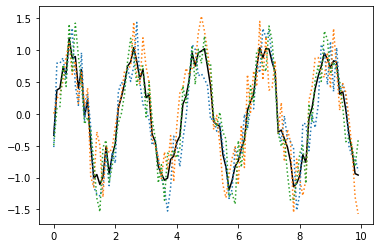

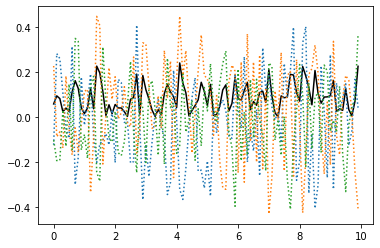

cost variance =  0.8763632547260826
cost autocorrelation =  -1.1657341758564144e-15
cost autocorrelation node  1 -0.17488740376601677
cost autocorrelation node  1 0.527091806892523
cost autocorrelation node  1 -0.3522044031265074


In [85]:
N = 3
T = 10
dt = 0.1
rand_amp = 0.6
time_array = np.arange(0,T,dt)

signal = np.zeros((N, np.around(T/dt).astype(int)))
for n in range(N):
    signal[n,:] = np.sin(3.*time_array)
    for t in range(len(time_array)):
        signal[n,t] += random.uniform(-rand_amp, rand_amp)
    

u_mean = mean(signal)
u_var = variance(signal, u_mean)
u_grad_var = grad_cost_variance(signal, u_mean)

plt.plot(time_array, u_mean, color='black')
for n in range(N):
    plt.plot(time_array, signal[n], linestyle=':')
plt.show()

plt.plot(time_array, u_var, color='black')
for n in range(N):
    plt.plot(time_array, u_grad_var[n,:], linestyle=':')
plt.show()

F_rv = cost_variance(u_var)
print("cost variance = ", F_rv)

F_ra = cost_autocorrelation(signal, u_mean, u_var)
print("cost autocorrelation = ", F_ra)
for n in range(N):
    F_ra_i = cost_autocorrelation_i(signal[n,:], u_mean, u_var)
    print("cost autocorrelation node ", i, F_ra_i)

[0.22773016 0.12443697 0.534019  ]
[0.00342346 0.15345501 0.08690037]
[ 0.2715293  -0.20511752  0.94666698]
[0.007585469567261712, 0.04160687558317746, -0.04919234515043916]
max cost autocorrelation =  0.04160687558317746 -0.04919234515043916


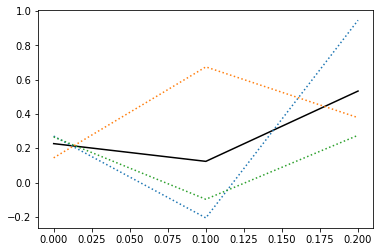

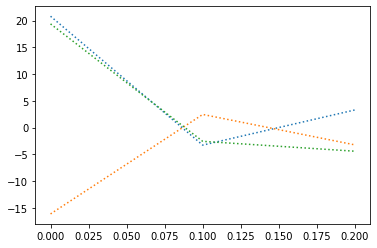

max cost autocorrelation =  0.04160687558317747 -0.04919234515043915


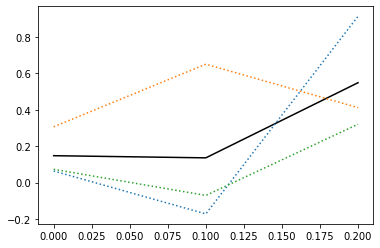

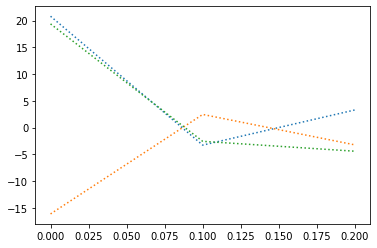

In [107]:
N = 3
T = 0.3
dt = 0.1
rand_amp = 0.6
time_array = np.arange(0,T,dt)

signal = np.zeros((N, np.around(T/dt).astype(int)))
for n in range(N):
    signal[n,:] = np.sin(3.*time_array)
    for t in range(len(time_array)):
        signal[n,t] += random.uniform(-rand_amp, rand_amp)
    

u_mean = mean(signal)
u_var = variance(signal, u_mean)
u_grad_auto = grad_cost_autocorrelation(signal, u_mean, u_var)

print(u_mean)
print(u_var)
print(signal[0,:])

F_ra_array = [cost_autocorrelation_i(signal[n,:], u_mean, u_var) for n in range(N)]
print(F_ra_array)
print("max cost autocorrelation = ", np.amax(F_ra_array), np.amin(F_ra_array))

plt.plot(time_array, u_mean, color='black')
for n in range(N):
    plt.plot(time_array, signal[n], linestyle=':')
plt.show()

for n in range(N):
    plt.plot(time_array, u_grad_auto[n,:], linestyle=':')
plt.show()

for i in range(1):
    grad = grad_cost_autocorrelation(signal, u_mean, u_var)
    signal -= 0.01 * grad / (i+1)
    u_mean = mean(signal)
    u_var = variance(signal, u_mean)
    F_ra_array = [cost_autocorrelation_i(signal[n,:], u_mean, u_var) for n in range(N)]
    print("max cost autocorrelation = ", np.amax(F_ra_array), np.amin(F_ra_array))
        
plt.plot(time_array, u_mean, color='black')
for n in range(N):
    plt.plot(time_array, signal[n], linestyle=':')
plt.show()

for n in range(N):
    plt.plot(time_array, grad[n,:], linestyle=':')
plt.show()